In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Flatten, BatchNormalization, Dense, MaxPooling2D
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import numpy as np
import pandas as pd
import os 
import shutil
import matplotlib.pyplot as plt
import random
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

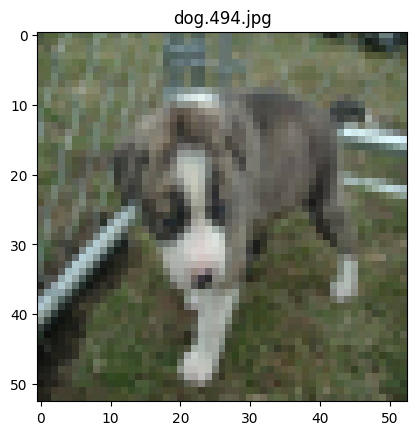

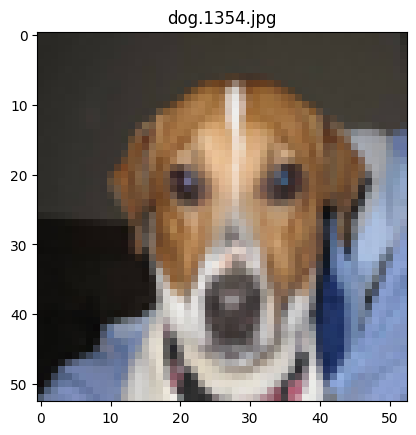

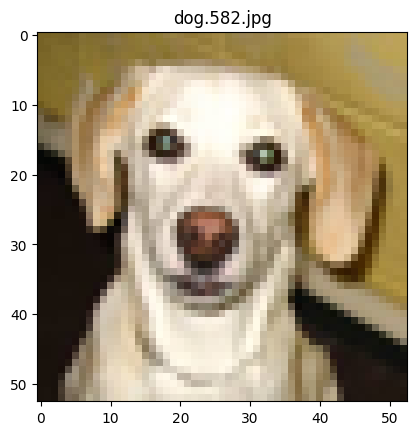

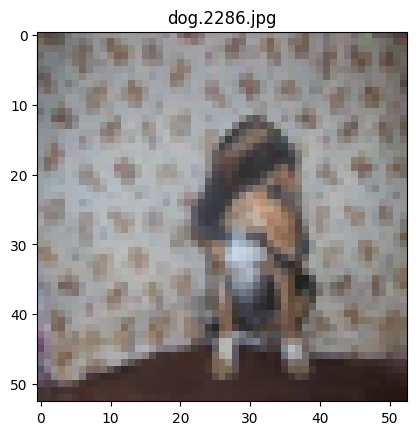

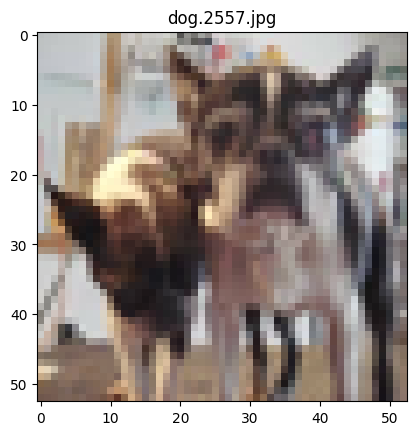

In [22]:
path_way = "C:\\Users\\batuy\\Documents\\VS Code\\cat-dog-simple-classification-with-web-flask\\training_set"

target_path = os.listdir(path_way)

random_dir = random.choice(target_path)

base_dir = os.path.join(path_way, random_dir)

images = []

for img in os.listdir(base_dir):
    if img.endswith(".jpg") or img.endswith(".png"):
        images.append(img)

random_img = random.sample(images, 5)

target_size = (53, 53)

for img_2 in random_img:
    img_way = os.path.join(base_dir,img_2)
    img__ = Image.open(img_way)
    img_resized = img__.resize(target_size)
    plt.imshow(img_resized)
    plt.title(img_2)
    plt.show()

In [3]:
train_data = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    validation_split=0.3
)

test_data = ImageDataGenerator(rescale=1./255)

In [4]:
img_size = (53, 53)

In [5]:
train_data_dir = train_data.flow_from_directory(directory="training_set", batch_size=64, class_mode="binary", target_size=img_size, subset="training")

test_data_dir = test_data.flow_from_directory(directory="test_set", batch_size=64, class_mode="binary", target_size=img_size)

val_data_dir = train_data.flow_from_directory(directory="training_set", batch_size=64, class_mode="binary", target_size=img_size, subset="validation")


Found 5604 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.
Found 2401 images belonging to 2 classes.


In [ ]:
model = Sequential()

model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid')) 

In [ ]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [ ]:
rlp = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, min_lr=0.000005, patience=2)
model_check = ModelCheckpoint(filepath="project.keras", monitor="val_loss", verbose=1 ,save_best_only=True)
early_ = EarlyStopping(monitor="val_loss",
                        min_delta=0.2,
                        patience=10,
                        verbose=1,
                        mode="auto",
                        baseline=None,
                        restore_best_weights=False,
                        start_from_epoch=0,)


callbacks = [rlp, early_]

In [ ]:
history = model.fit(train_data_dir, validation_data= val_data_dir, epochs=12, callbacks=callbacks)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random

# Modeli yükle
model = load_model("base_model_2.keras")

random_number = random.randint(1, 3999)

img_path = f"C:\\Users\\batuy\\Documents\\VS Code\\cat-dog-simple-classification-with-web-flask\\training_set\\cats\\cat.{random_number}.jpg"

img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  

predictions = model.predict(img_array)

predicted_index = np.argmax(predictions)  # En yüksek olasılığa sahip sınıfın indeksi
confidence = np.max(predictions) * 100  # En yüksek olasılık değeri

print(f"Predicted index: {predicted_index}")
print(f"Confidence: {confidence:.2f}%")

plt.imshow(img)


In [16]:
from keras.applications import VGG16
from keras.models import Model

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(53, 53, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64 ,activation="relu")(x)
prediction = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=prediction)

for layer in base_model.layers:
    layer.trainable = False

In [17]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Callbacks tanımla
rlp = ReduceLROnPlateau(monitor='val_accuracy', factor=0.3, patience=2, min_lr=1e-6)
model_check = ModelCheckpoint(filepath="vgg16_model.keras", monitor="val_loss", verbose=1, save_best_only=True)
early_ = EarlyStopping(monitor="val_loss", patience=10, verbose=1, restore_best_weights=True)
callbacks = [rlp, model_check, early_]

In [18]:
history = model.fit(train_data_dir, validation_data=val_data_dir, epochs=12, callbacks=callbacks)

Epoch 1/12
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.5953 - loss: 0.6579
Epoch 1: val_loss improved from inf to 0.59385, saving model to vgg16_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 31s 339ms/step - accuracy: 0.5959 - loss: 0.6576 - val_accuracy: 0.6797 - val_loss: 0.5939 - learning_rate: 0.0010
Epoch 2/12
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step - accuracy: 0.6923 - loss: 0.5879
Epoch 2: val_loss improved from 0.59385 to 0.58258, saving model to vgg16_model.keras
88/88 ━━━━━━━━━━━━━━━━━━━━ 29s 329ms/step - accuracy: 0.6923 - loss: 0.5879 - val_accuracy: 0.7005 - val_loss: 0.5826 - learning_rate: 0.0010
Epoch 3/12
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6927 - loss: 0.5843
Epoch 3: val_loss did not improve from 0.58258
88/88 ━━━━━━━━━━━━━━━━━━━━ 29s 325ms/step - accuracy: 0.6927 - loss: 0.5843 - val_accuracy: 0.6785 - val_loss: 0.5912 - learning_rate: 0.0010
Epoch 4/12
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.6893 - loss: 0.5830
Epoch 4: val_lo

In [19]:
deneme = model.evaluate(test_data_dir)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 219ms/step - accuracy: 0.7249 - loss: 0.5340


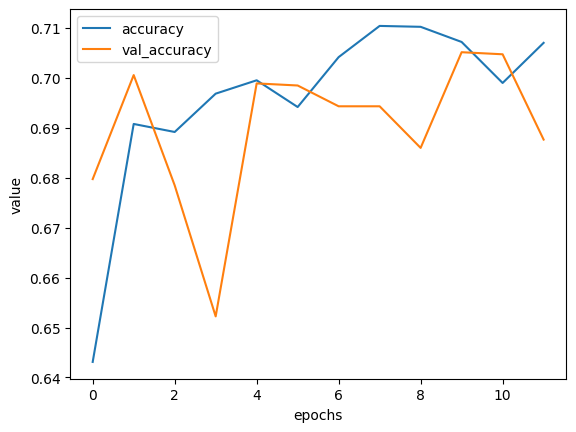

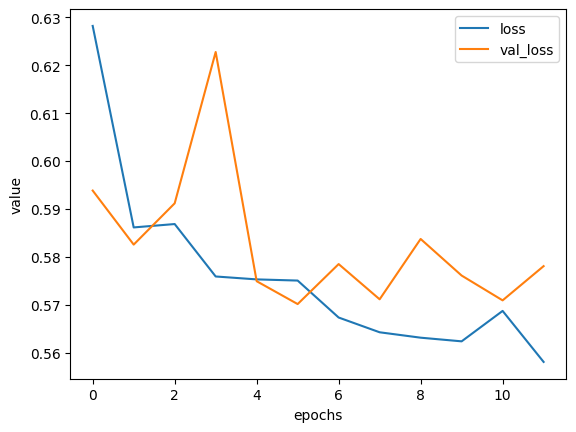

In [20]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.xlabel("epochs")
plt.ylabel("value")
plt.legend()
plt.show()

# ---------------------------------------------------------------

plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.xlabel("epochs")
plt.ylabel("value")
plt.legend()
plt.show()

In [21]:
model = load_model("vgg16_model.keras")

In [23]:
predict = model.predict(test_data_dir)

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 220ms/step


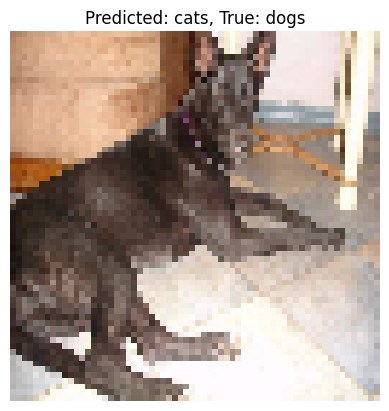

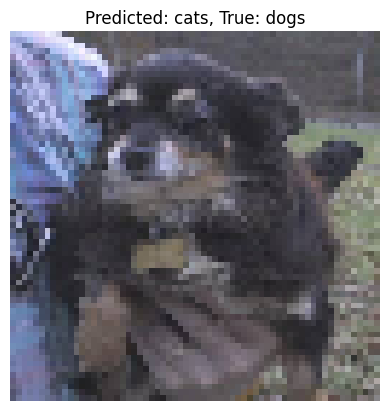

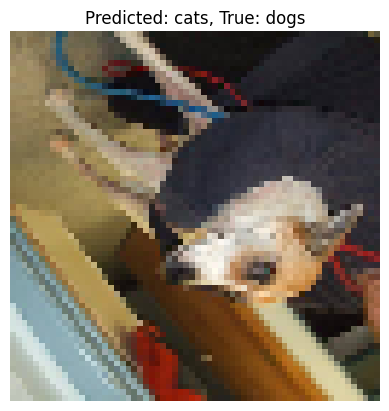

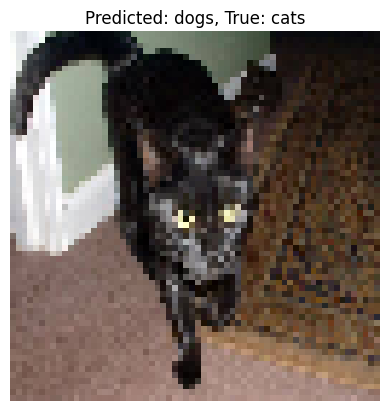

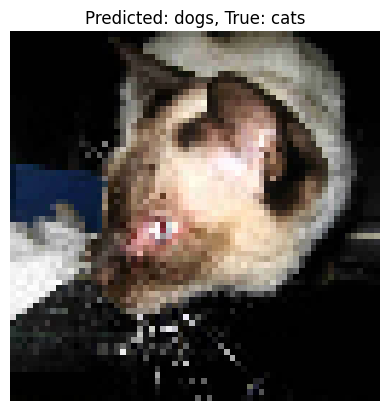

In [33]:
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Tahminleri sınıf etiketlerine dönüştürme
threshold = 0.5
class_predictions = (predict > threshold).astype(int)

# Test verilerinin etiketlerini elde etme
true_labels = test_data_dir.classes

# Sınıf isimlerini elde etme
class_labels = list(test_data_dir.class_indices.keys())

# Rastgele 5 resim seçme
random_indices = random.sample(range(len(class_predictions)), 5)

# Tahminleri ve gerçek etiketleri karşılaştırma ve görüntüleri gösterme
for idx in random_indices:
    predicted_label = class_labels[class_predictions[idx][0]]
    true_label = class_labels[true_labels[idx]]
    
    img_path = test_data_dir.filepaths[idx]
    img = image.load_img(img_path, target_size=(64, 64))
    
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_label}, True: {true_label}")
    plt.axis('off')
    plt.show()
